## Employee Exit Survey 

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey here and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

In this research we will answer some questions: 

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
3. Which institution has the highest people dissatisfied? 

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

| Column | Definition | 
| :--- | :--- | 
| `ID` | An id used to identify the participant of the survey | 
| `SeparationType` | The reason why the person's employment ended | 
|`Cease Date` | The year or month the person's employment ended | 
|`DETE Start Date` | The year the person began employment with the DETE| 

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

| Column | Definition | 
| :--- | :--- | 
|`Record ID` | An id used to identify the participant of the survey | 
|`Reason for ceasing employment` | The reason why the person's employment ended | 
|`LengthofServiceOverall Overall Length of Service at Institute (in years)` | The length of the person's employment (in years)|

In [1]:
import pandas as pd 
import matplotlib as plt 
import seaborn as sns
import numpy as np 
%matplotlib inline

First we are going to clean the data first 

In [2]:
#reading the dete survey data 
dete_survey = pd.read_csv("dete_survey.csv")

In [3]:
#reading the tafe survey data 
tafe_survey = pd.read_csv("tafe_survey.csv")

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
dete_survey.iloc[50,]

ID                                                                       51
SeparationType                         Resignation-Move overseas/interstate
Cease Date                                                             2012
DETE Start Date                                                        2009
Role Start Date                                                        2010
Position                                                            Cleaner
Classification                                                          NaN
Region                                                           South East
Business Unit                                                           NaN
Employment Status                                       Permanent Full-time
Career move to public sector                                          False
Career move to private sector                                         False
Interpersonal conflicts                                               False
Job dissatis

In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [8]:
tafe_survey.isnull().sum().sort_values(ascending = False)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Ill Health                                 265
Contributing Factors. Maternity/Family                           265
Contributing Factors. Career Move - Public Sector                265
                                                                ... 
CESSATION YEAR                                                     7
Reason for ceasing employment                                      1
WorkArea                                                           0
Institute                                                          0
Record ID                                                          0
Length: 72, dtype: int64

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


From the data in the dete_survey, we can see that: 

1. Despite the number of errors are almost zero for some such as DETE Start Date, it doesnt state missing value as NaN, therefore, there is a lot of undetected missing values 
2. Both, dete_survey and tafe_survey contains columns that we don't need to complete the analysis 
3. Some columns are the same but with the same name 

In [10]:
#therefore, to make the data more uniform, we change the values that is not NA but actually empty by rereading the data 
dete_survey = pd.read_csv("dete_survey.csv", na_values= "Not Stated")

### Data CLeaning 

In [11]:
#since the data is not necessary, we are going to drop the unused columns 
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1 )

In [12]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1 )

In [13]:
#Since the name of some columns are both the same but having different format, we 
#are going to rename the columns so that it can be combined successfully. 
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.rstrip().str.replace(" ","_")

In [14]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [15]:
tafe_survey_updated.rename( columns = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, inplace = True)

In [16]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [17]:
#There are a lot of type of reasons why people resigned, since we want to only find out how many of them 
#are resigning because of dissatisfied with the job, we are going to consider things as dissatisfaction into true and else false
dete_survey_updated["separationtype"].value_counts(ascending = True)

Termination                              15
Contract Expired                         34
Other                                    49
Ill Health Retirement                    61
Voluntary Early Retirement (VER)         67
Resignation-Move overseas/interstate     70
Resignation-Other employer               91
Resignation-Other reasons               150
Age Retirement                          285
Name: separationtype, dtype: int64

In [18]:
tafe_survey_updated["separationtype"].value_counts(ascending = True)

Termination                  23
Transfer                     25
Retirement                   82
Retrenchment/ Redundancy    104
Contract Expired            127
Resignation                 340
Name: separationtype, dtype: int64

In [19]:
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str.split("-").str[0]

In [20]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"] == "Resignation"].copy()

In [21]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"].copy()

In [22]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [23]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

We already done filtering the data into only resignation type of data, since we only want to analyze it

In [24]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
09/2010      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [25]:
#Now we want to know, how long their service is, therefore, we are going to make a column for year difference 
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str.get(-1).astype(float)

In [26]:
dete_resignations["cease_date"].value_counts().sort_index(ascending = True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [27]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending = True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [28]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending = True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

<AxesSubplot:>

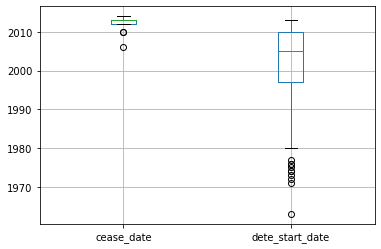

In [29]:
dete_resignations.boxplot(column = ["cease_date", "dete_start_date"])

<AxesSubplot:>

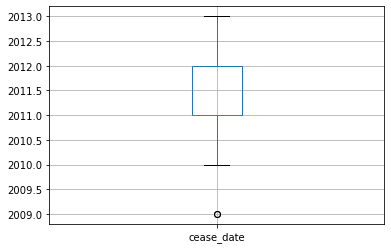

In [30]:
tafe_resignations.boxplot(column = "cease_date")

There are no any major issues within the year, therefore, we are going to continue with the research

In [31]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

In [32]:
#Below is the service that has been done by the employees 
dete_resignations["institute_service"].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

#### Classification for True and False to the dissatisfaction 

In [33]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [34]:
tafe_resignations["Contributing Factors. Dissatisfaction"].isnull().value_counts()

False    332
True       8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [35]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [36]:
def update_vals(string): 
    if type(string) != str: 
        return np.nan 
    elif string == "-": 
        return False 
    else: 
        return True 

In [37]:
tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]]= tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals)

In [38]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna = False)
                                                                

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [39]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna = False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [40]:
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].any(axis = 1, skipna = False)

In [41]:
tafe_resignations["dissatisfied"].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [42]:
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction", "dissatisfaction_with_the_department",
"physical_work_environment",
"lack_of_recognition",
"lack_of_job_security",
"work_location",
"employment_conditions",
"work_life_balance",
"workload"]].any(axis = 1, skipna = False)

In [43]:
dete_resignations["dissatisfied"].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [44]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

### Combination 

In [45]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

In [46]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True) 

In [47]:
combined["institute"].value_counts()

TAFE    340
DETE    311
Name: institute, dtype: int64

In [48]:
#to erase the column with high number of null value
combined_updated = combined.dropna(thresh = 500, axis = 1)

In [49]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


### For question 1, dissatisfaction in career stage 

In [50]:
combined["institute_service"] = combined["institute_service"]

In [51]:
combined["institute_service"].value_counts().sum()

563

In [52]:
pattern = r"(?P<first_duration>[0-9][0-9]?[.]?[0]?[-]?[1-9]?[0-9]?)?" 

In [53]:
combined.set_index("id",inplace = True)

In [54]:
years = combined["institute_service"].astype(str).str.extractall(pattern)

In [55]:
years.value_counts().sum()

563

In [56]:
years["first_duration"] = years["first_duration"].str.split("-").str[-1].astype(float)

In [57]:
years

first_duration
id           match                
4.000000e+00 0                 7.0
             1                 NaN
6.000000e+00 0                18.0
             1                 NaN
9.000000e+00 0                 3.0
...                            ...
6.350677e+17 3                 NaN
6.350704e+17 0                 6.0
             1                 NaN
6.350730e+17 0                 4.0
             1                 NaN

[2733 rows x 1 columns]

In [58]:
combined["institute_service"].value_counts().sum()

563

In [59]:
combined = combined.merge(right = years, on = "id")

In [60]:
combined["institution_service"] = combined["first_duration"]

In [61]:
combined["institution_service"].value_counts().sum()

563

In [62]:
def mapping_values(interger):
    if interger < 3: 
        return "New"
    elif 3 <= interger <= 6: 
        return "Experienced"
    elif 7 <= interger <= 10: 
        return "Established"
    elif interger >= 11: 
        return "Veteran"
    else: 
        return np.nan

In [63]:
combined["service_cat"] = combined["institution_service"].apply(mapping_values)

In [64]:
combined["service_cat"].value_counts().sum()

563

In [65]:
combined["dissatisfied"].value_counts(dropna = False)

False    1804
True      897
NaN        32
Name: dissatisfied, dtype: int64

In [66]:
combined["dissatisfied"] = combined["dissatisfied"].fillna(False)

In [67]:
combined["dissatisfied"].value_counts(dropna = False)

False    1836
True      897
Name: dissatisfied, dtype: int64

In [68]:
percentage_per_career_stage = combined.pivot_table( index = "service_cat", values = "dissatisfied", aggfunc = np.mean) 

<AxesSubplot:xlabel='service_cat'>

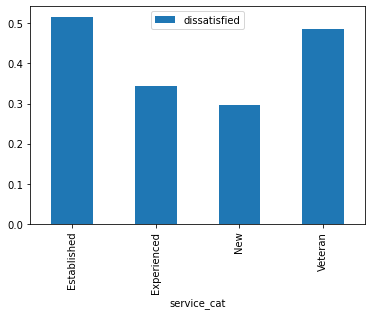

In [69]:
percentage_per_career_stage.plot(kind = "bar")

This can show that the percentage of the employees that resigned due to the dissatisfied, lies in establised and veteran career stage 

### Number of dissatisfaction per career stage 

In [70]:
#now we are going to know, what is the total for the people that is resigned because of dissatisfaction in the career stage 
total_per_career_stage = combined.pivot_table(index = "service_cat", values = "dissatisfied", aggfunc = sum)

<AxesSubplot:xlabel='service_cat'>

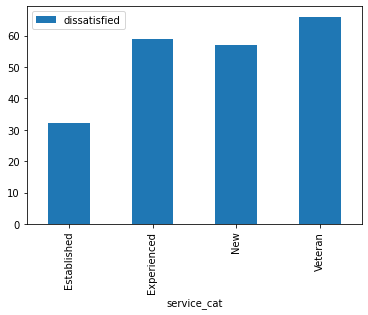

In [71]:
total_per_career_stage.plot(kind = "bar")

In terms of numbers however, the veteran and experienced are having the most people resigned due to dissatisfaction 

In [72]:
#now we are going to analyze whether age contribute to the resignation due to dissatisfaction 
combined["age"].value_counts()

51-55            390
41  45           240
31  35           229
26  30           229
46  50           198
36  40           184
21  25           171
56 or older      169
41-45            104
46-50            100
20 or younger     95
36-40             92
26-30             78
21-25             64
56-60             60
31-35             58
61 or older       56
Name: age, dtype: int64

### For question 2 dissastisfaction per Age group 

In [73]:
pattern_2 = r"([0-9][0-9][-]?[ ]?[ ]?[0-9]?[0-9]?)"

In [74]:
combined["age_cleaned"] = combined["age"].str.extract(pattern_2)

In [75]:
combined["age_cleaned"].value_counts()

51-55     390
41  45    240
26  30    229
31  35    229
46  50    198
36  40    184
21  25    171
56        169
41-45     104
46-50     100
20         95
36-40      92
26-30      78
21-25      64
56-60      60
31-35      58
61         56
Name: age_cleaned, dtype: int64

In [76]:
combined["age_cleaned"] = combined["age_cleaned"].str.replace("-","  ")

In [77]:
combined["age_cleaned"].value_counts()

51  55    390
41  45    344
26  30    307
46  50    298
31  35    287
36  40    276
21  25    235
56        169
20         95
56  60     60
61         56
Name: age_cleaned, dtype: int64

In [78]:
combined["age_cleaned"] = combined["age_cleaned"].str.split("  ").str[-1].astype(float)

In [79]:
combined["age_cleaned"].value_counts()

55.0    390
45.0    344
30.0    307
50.0    298
35.0    287
40.0    276
25.0    235
56.0    169
20.0     95
60.0     60
61.0     56
Name: age_cleaned, dtype: int64

In [80]:
def classifying_age(interger): 
    if interger <= 30:
        return "Young Adult"
    elif 31 <= interger <= 45: 
        return "Middle Aged Adult"
    elif 46<=interger: 
        return "Old Aged Adult"

In [81]:
combined["classified_age"] = combined["age_cleaned"].apply(classifying_age)

In [82]:
combined["classified_age"].value_counts(dropna=False)

Old Aged Adult       973
Middle Aged Adult    907
Young Adult          637
NaN                  216
Name: classified_age, dtype: int64

In [83]:
#Now we are classifying it 
classified_age_group = combined.pivot_table(index = "classified_age", values = "dissatisfied", aggfunc = sum)

<AxesSubplot:xlabel='classified_age'>

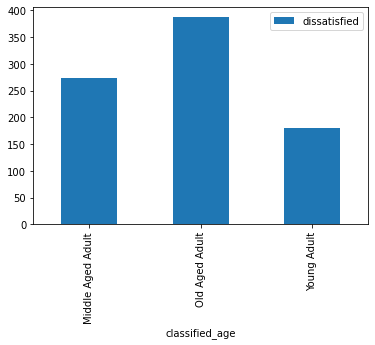

In [84]:
classified_age_group.plot(kind = "bar")

It can be seen that old aged adult is having the highest number of resigning due to the dissatisfaction 

In [85]:
classified_age_group_percentage = combined.pivot_table(index = "classified_age", values = "dissatisfied", aggfunc = np.mean)

<AxesSubplot:xlabel='classified_age'>

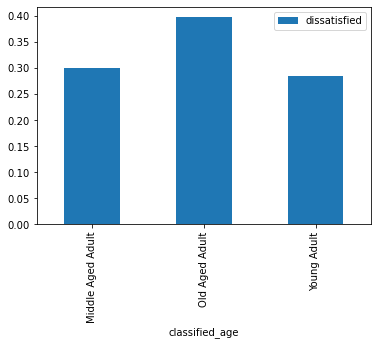

In [86]:
classified_age_group_percentage.plot(kind = "bar")

It can be seen that old aged adult is having the highest percentage of resigning due to the dissatisfaction 

### For question 3 dissatisfaction per institution 

In [87]:
number_of_people_dissatisfied_per_institution = combined.pivot_table(index = "institute", values = "dissatisfied", aggfunc = sum)

<AxesSubplot:xlabel='institute'>

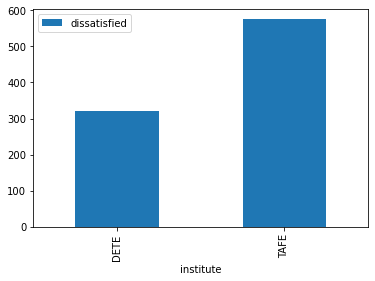

In [88]:
number_of_people_dissatisfied_per_institution.plot(kind="bar")

This conclude that Tafe insitution has the highes number of people resigning due to dissatisfaction 

In [89]:
percentage_of_people_dissatisfied_per_institution = combined.pivot_table(index = "institute", values = "dissatisfied", aggfunc = np.mean)

<AxesSubplot:xlabel='institute'>

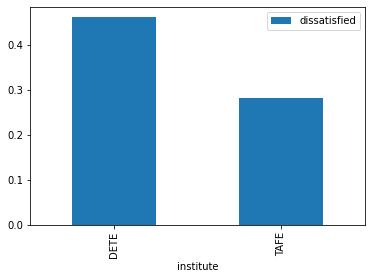

In [90]:
percentage_of_people_dissatisfied_per_institution.plot(kind="bar")

However, in terms of percentage, Dete has higher percentage compare to tafe in terms of people resigning due to the dissatisfaction